<a href="https://colab.research.google.com/github/aadikamble/Letsgrowmore/blob/master/Beginner_Level_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA SCIENCE INTERN @LETSGROWMORE (LGMVIP)


**Beginner level**
## #Task 1 - Iris Flower Classification ML Project| Dataset_Link - http://archive.ics.uci.edu/ml/datasets/Iris

Author - AADITYA KAMBLE

Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import scipy.stats as st
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
pip install scikit-plot

Load Dataset

In [ ]:
data = pd.read_csv("/content/IRIS-2.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['species'].nunique()

3

In [ ]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
data.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [ ]:
data.min()

sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object

In [ ]:
df = data.groupby('species')
df

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [ ]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


*italicized text*##Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


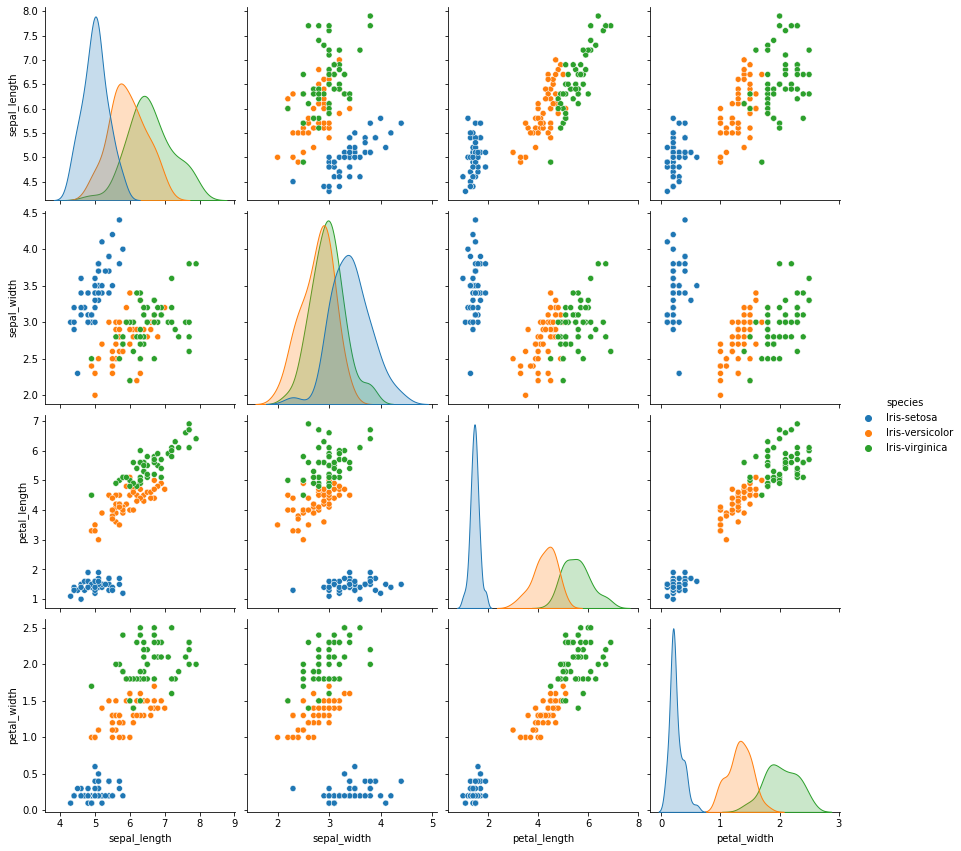

In [ ]:
sns.pairplot(data, hue = "species", size = 3);
sns.set_style("whitegrid");
plt.show()

1. We can see that petal_length and petal_width are the most useful features to identify various flower types.
2. While setosa can be easily identified(linearly seperable), Virginica and Versicolor have some overlap(almost linearly seperable)

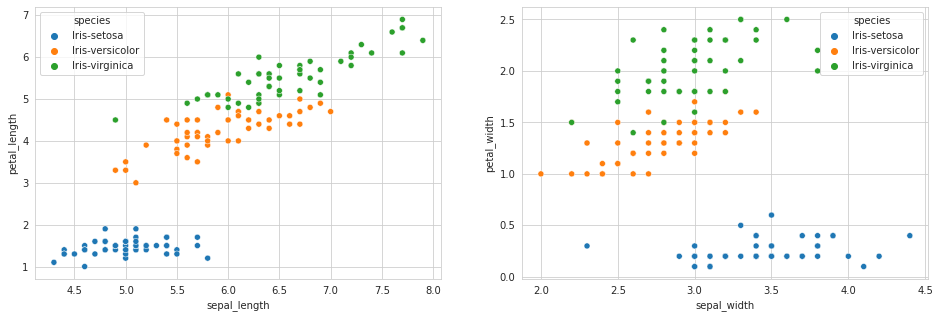

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length',y='petal_length',data=data,hue='species',ax=ax1)
sns.scatterplot(x='sepal_width',y='petal_width',data=data,hue='species',ax=ax2)

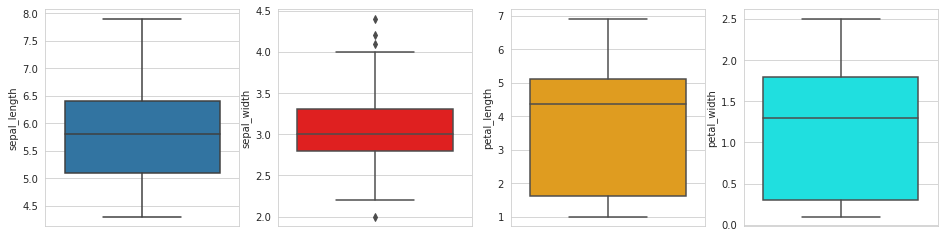

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=data,y='sepal_length')
plt.subplot(1,4,2)
sns.boxplot(data=data,y='sepal_width',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=data,y='petal_length',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=data,y='petal_width',color='cyan')

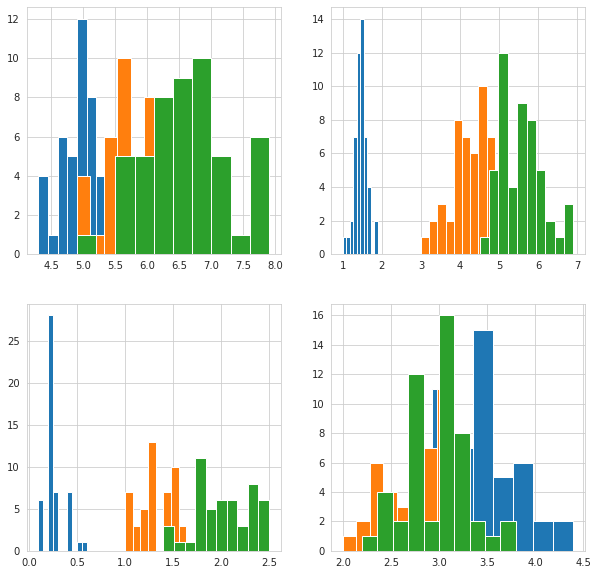

In [ ]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['sepal_length'].hist(ax=axes[0][0])
    df['petal_length'].hist(ax=axes[0][1])
    df['petal_width'].hist(ax=axes[1][0])
    df['sepal_width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

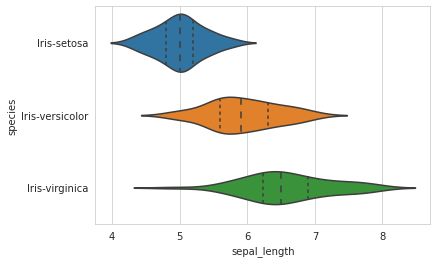

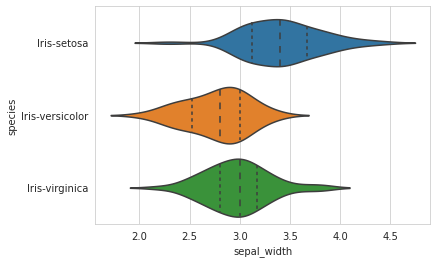

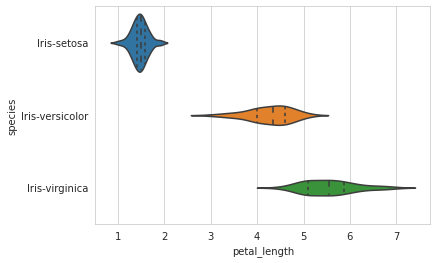

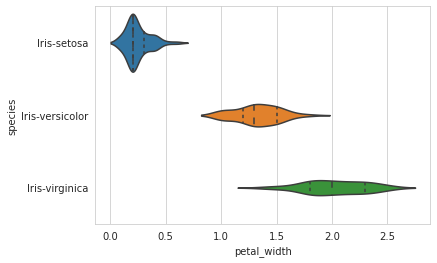

In [ ]:
sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

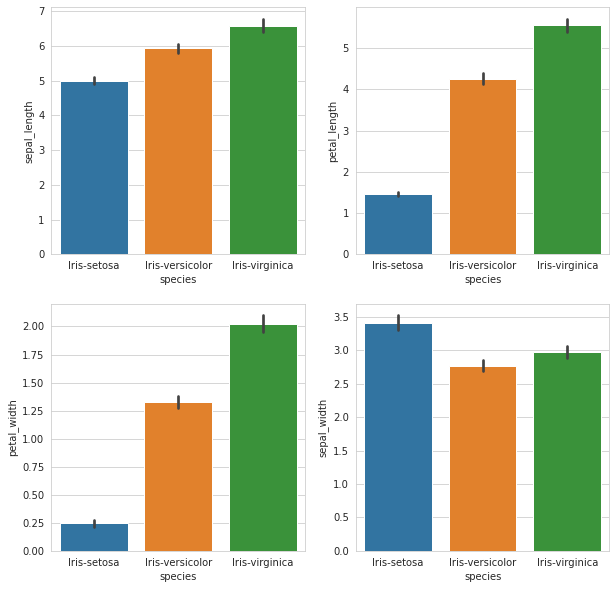

In [ ]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=data.species,y=data['sepal_length'],ax=axes[0][0])
    sns.barplot(x=data.species,y=data['petal_length'],ax=axes[0][1])
    sns.barplot(x=data.species,y=data['petal_width'],ax=axes[1][0])
    sns.barplot(x=data.species,y=data['sepal_width'],ax=axes[1][1])
    plt.show()
    
barplots()

#Correlation

In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


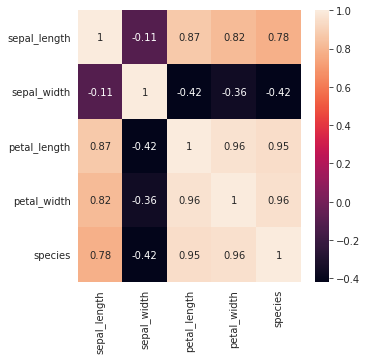

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

#Encoding the categorical feature as one-hot numeric feature

In [ ]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,1
125,7.2,3.2,6.0,1.8,2
1,4.9,3.0,1.4,0.2,0
75,6.6,3.0,4.4,1.4,1
70,5.9,3.2,4.8,1.8,1
51,6.4,3.2,4.5,1.5,1
88,5.6,3.0,4.1,1.3,1
41,4.5,2.3,1.3,0.3,0
145,6.7,3.0,5.2,2.3,2
132,6.4,2.8,5.6,2.2,2


In [ ]:
x = data.iloc[:,:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = data.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Spliting the dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


##Model Preparation

Lgistic Regression

In [ ]:
model = LogisticRegression()

model.fit(x_train,y_train)

sc_logr = round(model.score(x_test, y_test) * 100,2)

print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNN 